In [9]:
import os
os.chdir('../quafing/')
print(f"Working directory: {os.getcwd()}")
import quafing as q


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15, 
                     "figure.dpi" : 100, 
                     "legend.fontsize" : 13, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True, 
                     "figure.figsize":(6, 5)})

Working directory: /Users/charlesdupont/Desktop/Thesis/code/quafing


In [227]:
def load_data(path):
    """
    Loads .dta file using provided path.
    """
    return pd.read_stata(path, convert_categoricals=False)


def plot_missing_prop(df):
    """
    Plots bar graph to visualize proportion of missing entries for each column of provided df.
    """
    missing_prop = {}
    L = len(df)
    for col in df.columns:
        missing_prop[col] = df[col].isna().sum()/L
    ordered_keys = sorted(missing_prop.keys(), key=lambda x: missing_prop[x], reverse=True)
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(missing_prop)), [missing_prop[k] for k in ordered_keys], color="dodgerblue")
    plt.xticks(np.arange(len(missing_prop)), ordered_keys, rotation=90)
    plt.ylabel("Proportion Missing")
    plt.show()
    
    
def plot_categorical_feature_frequency(df, col, sort=True, xlabel=None, xticks_dict={}):
    freq = Counter(df[col])
    freq = {k:v for k,v in freq.items() if not np.isnan(k)}
    L = len(freq)
    if sort:
        ordered_keys = sorted(freq.keys(), key=lambda x: freq[x], reverse=True)
    else:
        ordered_keys = sorted(freq.keys(), key=lambda x: x)
    plt.figure(figsize=(12,4))
    plt.bar(np.arange(L), [freq[k] for k in ordered_keys], color="dodgerblue", alpha=0.8)
    if xticks_dict:
        plt.xticks(np.arange(L), [xticks_dict[k] for k in ordered_keys], rotation=90)
    else:
        plt.xticks(np.arange(L), ordered_keys, rotation=90)
    plt.ylabel("Frequency")
    if xlabel:
        plt.xlabel(xlabel, labelpad=20)
    else:
        plt.xlabel(col, labelpad=20)
    plt.show()

In [3]:
DATA_DIR = "../../BCCASII/"

# Household

In [4]:
DATA_SUBDIR = "Household/"

___

## Module A: Location and identification detail

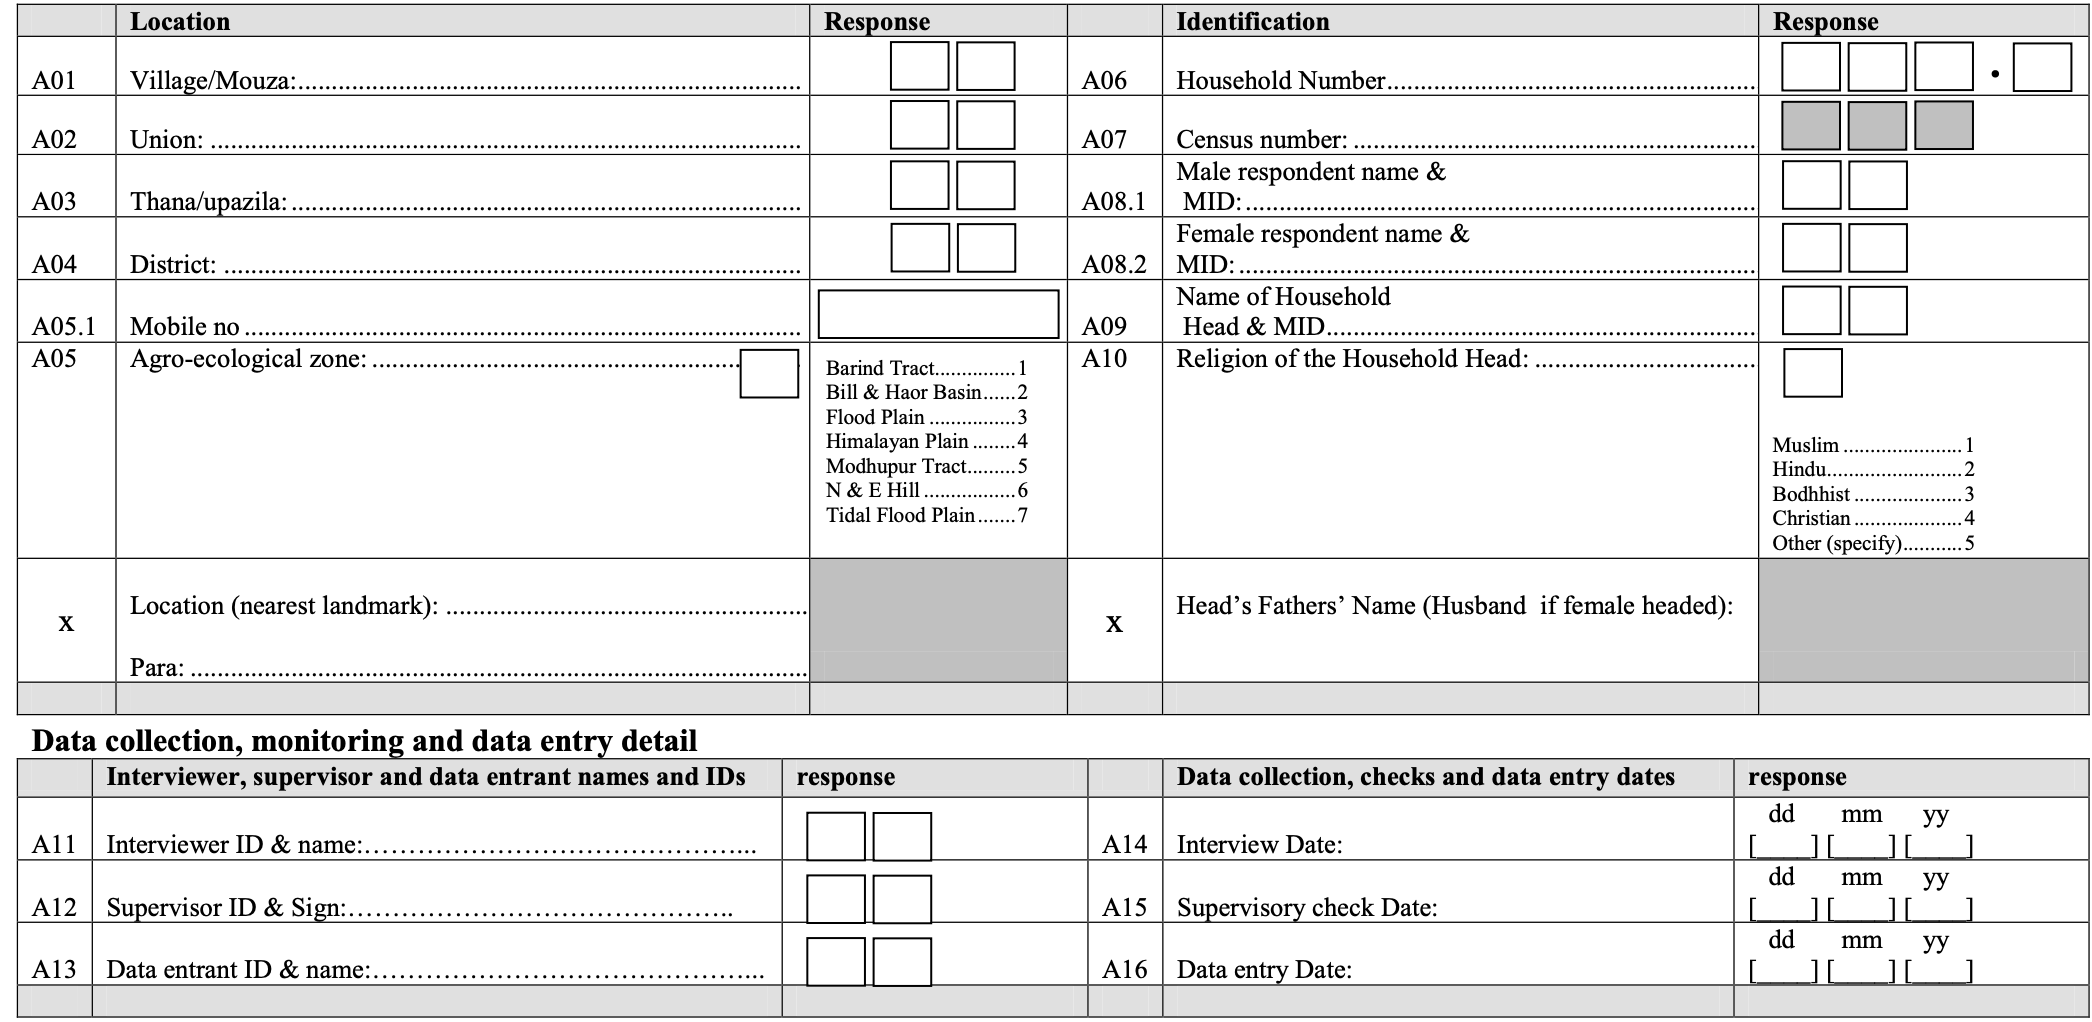

In [87]:
filename = "001_mod_a.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,vcode,ucode,tcode,dcode,phone,ezcode,hhid,rid_male,rid_female,hhhid,...,a14dd,a14mm,a14yy,a15dd,a15mm,a15yy,a16dd,a16mm,a16yy,flag
0,NaN,1,1,1,,7,1.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
1,NaN,1,1,1,,7,2.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,1,1,,7,3.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
3,NaN,1,1,1,,7,4.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
4,NaN,1,1,1,,7,5.0,NaN,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,NaN,40,39,31,,6,796.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,NaN,40,39,31,,6,797.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,NaN,40,39,31,,6,798.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,NaN,40,39,31,,6,799.0,8.0,2.0,2.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vcode        0 non-null      float64
 1   ucode        827 non-null    int8   
 2   tcode        827 non-null    int8   
 3   dcode        827 non-null    int8   
 4   phone        827 non-null    object 
 5   ezcode       827 non-null    int8   
 6   hhid         827 non-null    float32
 7   rid_male     716 non-null    float64
 8   rid_female   795 non-null    float64
 9   hhhid        805 non-null    float64
 10  religion     0 non-null      float64
 11  interviewer  0 non-null      float64
 12  supervisor   0 non-null      float64
 13  a14dd        0 non-null      float64
 14  a14mm        0 non-null      float64
 15  a14yy        825 non-null    float64
 16  a15dd        0 non-null      float64
 17  a15mm        0 non-null      float64
 18  a15yy        283 non-null    float64
 19  a16dd   

### Villages

In [7]:
# only NAN values for village
df["vcode"].unique()

array([nan])

### Unions

There are 4562 unions in Bangladesh, each made up of nine "wards". Usually one village is designated as a ward, which is a local authority area.

There are 40 unique unions.


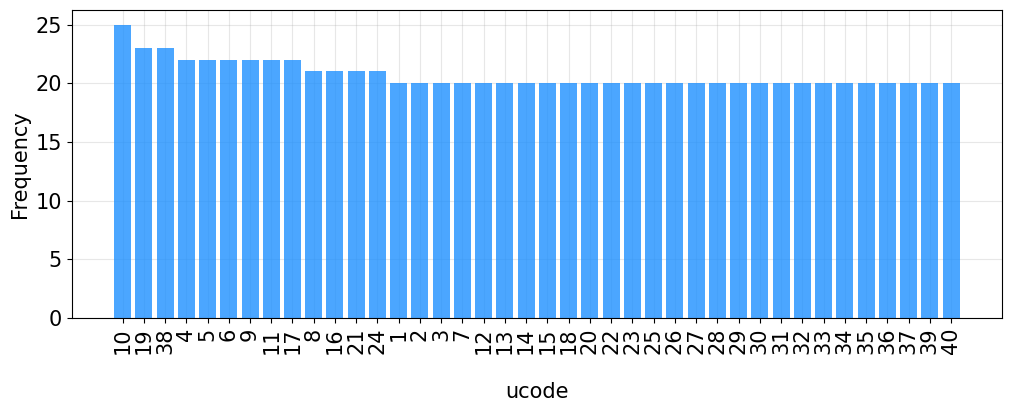

In [10]:
col = "ucode"
unique_unions = df[col].unique()
print(f"There are {len(unique_unions)} unique unions.")
plot_categorical_feature_frequency(df, col)

### Districts

There are 64 districts total in Bangladesh, further divided into 492 upazilas (sub-districts).

There are 30 unique districts.


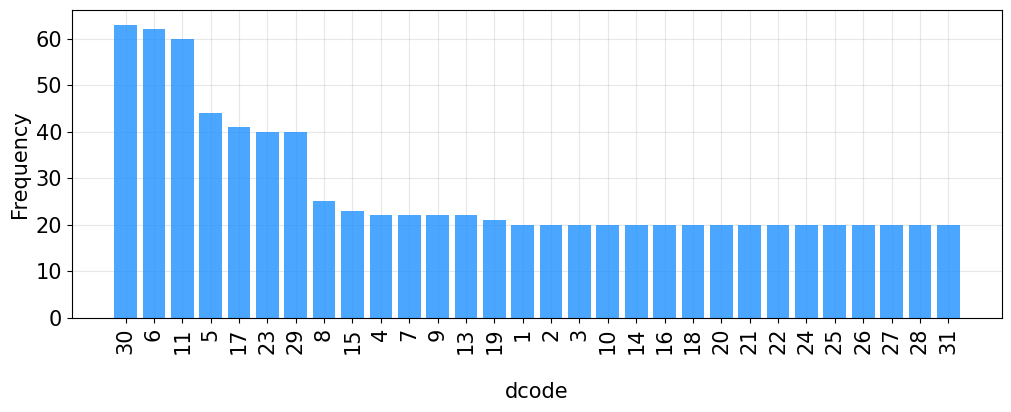

In [12]:
col = "dcode"
unique_districts = df[col].unique()
print(f"There are {len(unique_districts)} unique districts.")
plot_categorical_feature_frequency(df, col)

# dcode = 12 not present

### Thana/upazila

Upazilas are administrative region in Bangladesh, functioning as a sub-unit of a district.


There are 39 unique upazilas.


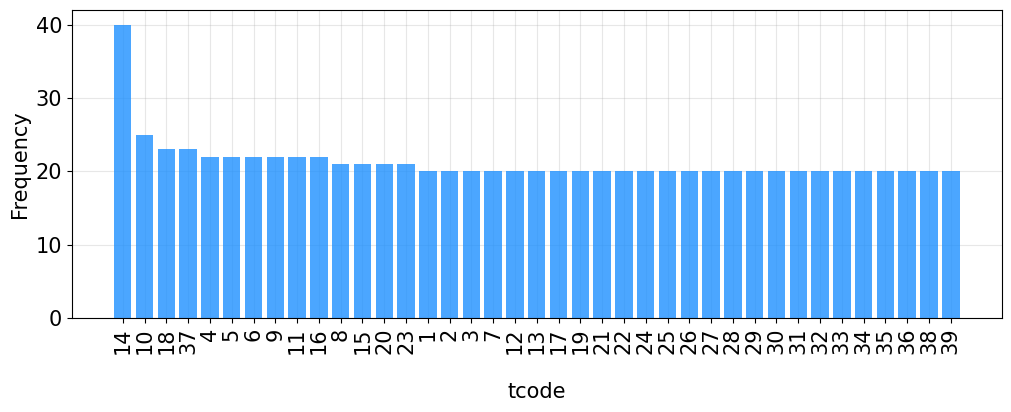

In [13]:
col = "tcode"
unique_upazilas = df[col].unique()
print(f"There are {len(unique_upazilas)} unique upazilas.")
plot_categorical_feature_frequency(df, col)

### Mobile number

In [14]:
# only empty values for mobile number
df["phone"].unique()

array([' '], dtype=object)

### Agro-ecological zone

There are 7 unique agro-ecological zones.


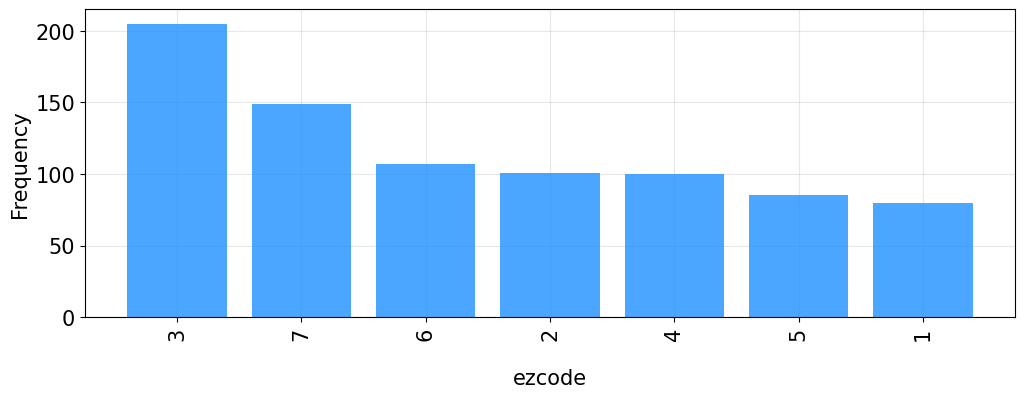

In [15]:
col = "ezcode"
unique_ezones = df[col].unique()
print(f"There are {len(unique_ezones)} unique agro-ecological zones.")
plot_categorical_feature_frequency(df, col)

### Household Number

In [16]:
L = len(df["hhid"].unique())
print(f"There are {L} unique households.")

There are 827 unique households.


### Male, female respondent identifiers

Not entirely sure what to make of these.

In [61]:
L = len(df)
print(f"{100*sum(df.rid_male.isna())/L:.2f}% of households do not have a male respondent identifier")
print(f"{100*sum(df.rid_female.isna())/L:.2f}% of households do not have a female respondent identifier")

13.42% of households do not have a male respondent identifier
3.87% of households do not have a female respondent identifier


### Household head

In [68]:
print(f"{100*sum(df.hhhid.isna())/L:.2f}% of households do not have a household head ID")

2.66% of households do not have a household head ID


### Religion of household head

In [71]:
# religion column is missing entirely
df["religion"].unique()

array([nan])

### Interviewer, supervisor

In [74]:
# all empty
print(df.interviewer.unique(), df.supervisor.unique())

[nan] [nan]


### Year 

In [80]:
# day and month entries are empty, year is filled out as 2012 but not everywhere
df["a14yy"].unique(), df["a15yy"].unique()

(array([2012.,   nan]), array([2012.,   nan]))

### Flag

Not sure what this is.

In [81]:
df.flag.unique()

array([nan,  1.,  2.])

___

## Module B: Household composition and education

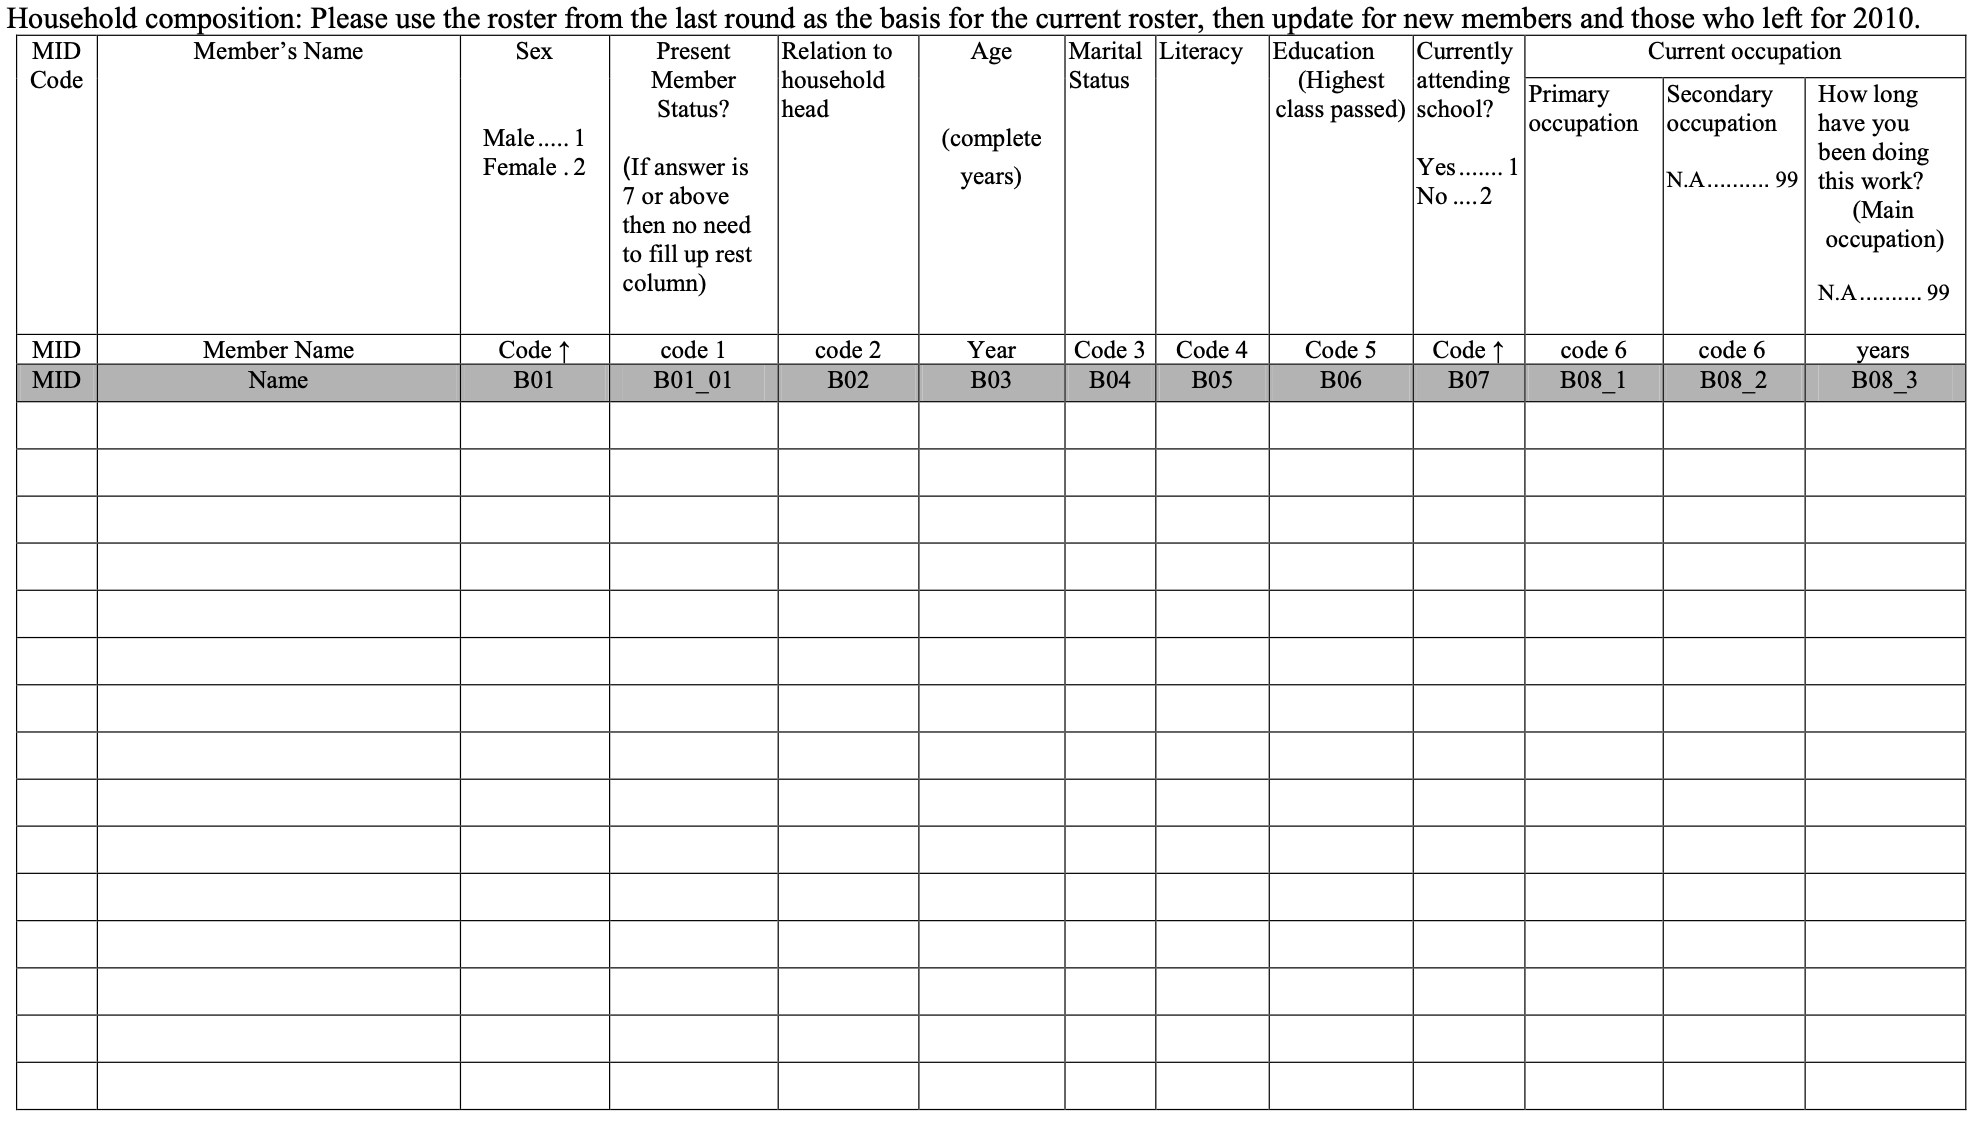

In [88]:
filename = "002_mod_b.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,mid,b01,b01_1,b02,b03,b04,b05,b06,b07,b08_1,b08_2,b08_3
0,1.0,1,1,0,1.0,47.0,2.0,4.0,6.0,2.0,4.0,5.0,25.0
1,1.0,2,2,0,2.0,40.0,2.0,4.0,6.0,2.0,21.0,5.0,22.0
2,1.0,3,1,0,3.0,19.0,1.0,4.0,12.0,1.0,20.0,4.0,6.0
3,1.0,4,2,0,3.0,17.0,1.0,4.0,9.0,1.0,20.0,5.0,4.0
4,1.0,5,2,0,3.0,13.0,1.0,4.0,6.0,1.0,20.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,799.0,9,2,2,4.0,16.0,2.0,4.0,5.0,2.0,21.0,99.0,99.0
4537,800.0,1,1,0,2.0,37.0,2.0,1.0,99.0,2.0,23.0,99.0,99.0
4538,800.0,2,2,0,1.0,32.0,2.0,1.0,99.0,2.0,21.0,4.0,10.0
4539,800.0,3,1,0,3.0,7.0,1.0,4.0,1.0,1.0,20.0,99.0,99.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 0 to 4540
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hhid    4541 non-null   float32
 1   mid     4541 non-null   int8   
 2   b01     4541 non-null   int8   
 3   b01_1   4541 non-null   int8   
 4   b02     3870 non-null   float64
 5   b03     3870 non-null   float64
 6   b04     3870 non-null   float64
 7   b05     3870 non-null   float64
 8   b06     3870 non-null   float64
 9   b07     3870 non-null   float64
 10  b08_1   3870 non-null   float64
 11  b08_2   3870 non-null   float64
 12  b08_3   3870 non-null   float64
dtypes: float32(1), float64(9), int8(3)
memory usage: 385.8 KB


### Number of members per household

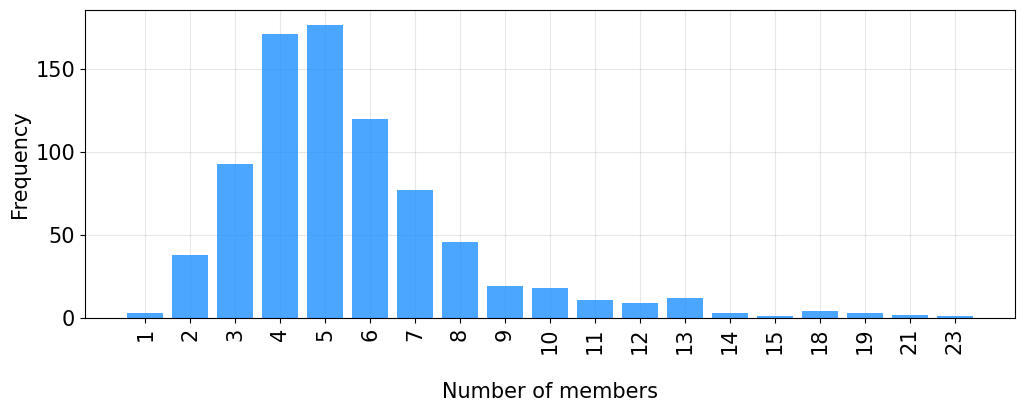

In [111]:
plot_categorical_feature_frequency(df.groupby("hhid").count(), "mid", sort=False, xlabel="Number of members")

### Number of males, females per household

In [191]:
males = []
females = []
for hhid in df["hhid"].unique():
    household = df.loc[df.hhid==hhid]
    m = sum(household["b01"]==1)
    f = sum(household["b01"]==2)
    males.append(m)
    females.append(f)

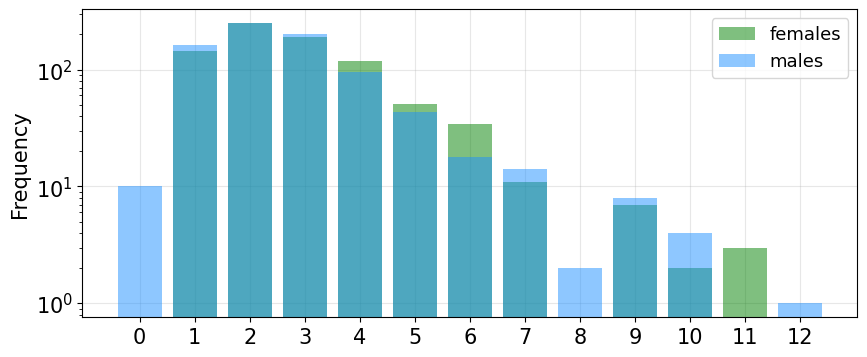

In [193]:
plt.figure(figsize=(10, 4))

f_counter = Counter(females)
for i in range(max(f_counter.keys())):
    if i not in f_counter:
        f_counter[i] = 0
plt.bar(np.arange(len(f_counter)), [f_counter[k] for k in sorted(f_counter.keys())], 
        color="green", alpha=0.5, label="females")

m_counter = Counter(males)
for i in range(max(m_counter.keys())):
    if i not in m_counter:
        m_counter[i] = 0
plt.bar(np.arange(len(m_counter)), [m_counter[k] for k in sorted(m_counter.keys())], 
        color="dodgerblue", alpha=0.5, label="males")
plt.ylabel("Frequency")

plt.xticks(np.arange(13))

plt.yscale("log")
plt.legend()
plt.show()

### Literacy

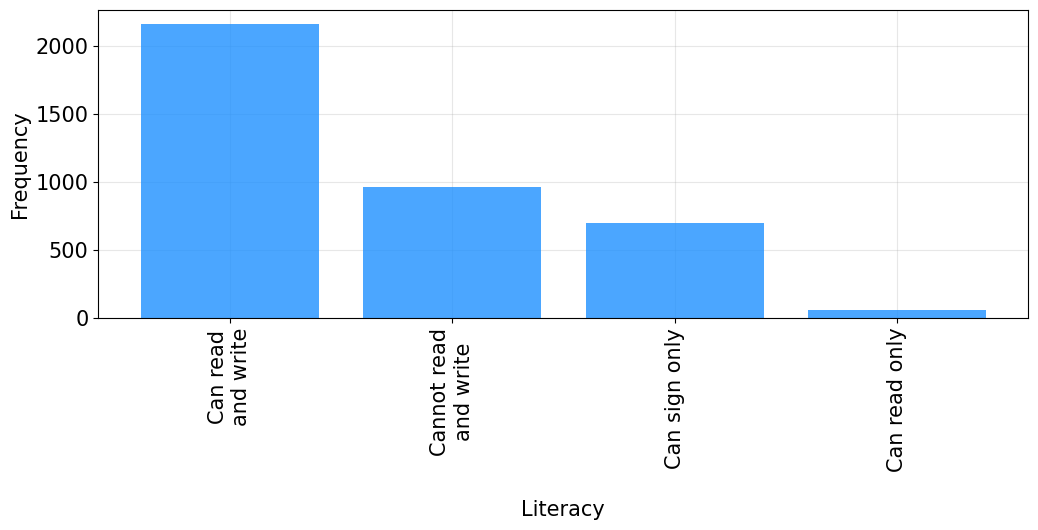

In [229]:
xticks_dict = {
    1: "Cannot read\nand write",
    2: "Can sign only",
    3: "Can read only",
    4: "Can read\nand write"
}

plot_categorical_feature_frequency(df, "b05", xlabel="Literacy", xticks_dict=xticks_dict)

### Education

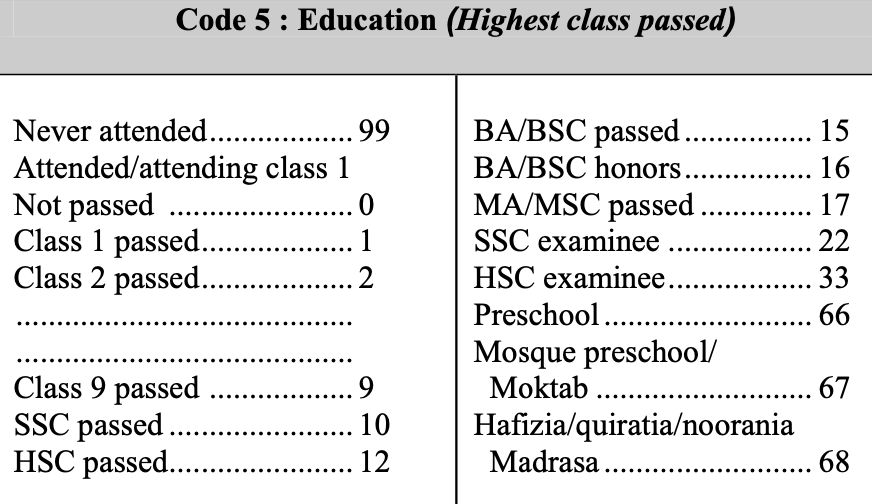

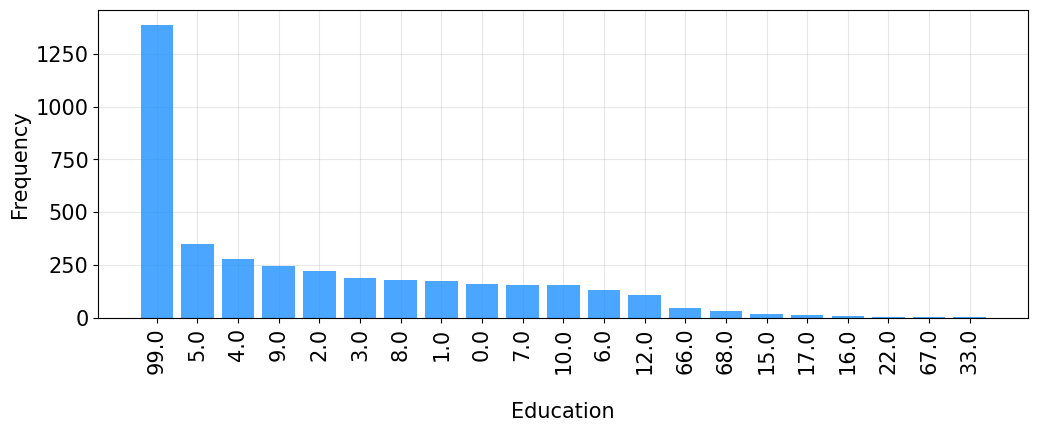

In [237]:
plot_categorical_feature_frequency(df, "b06", xlabel="Education")

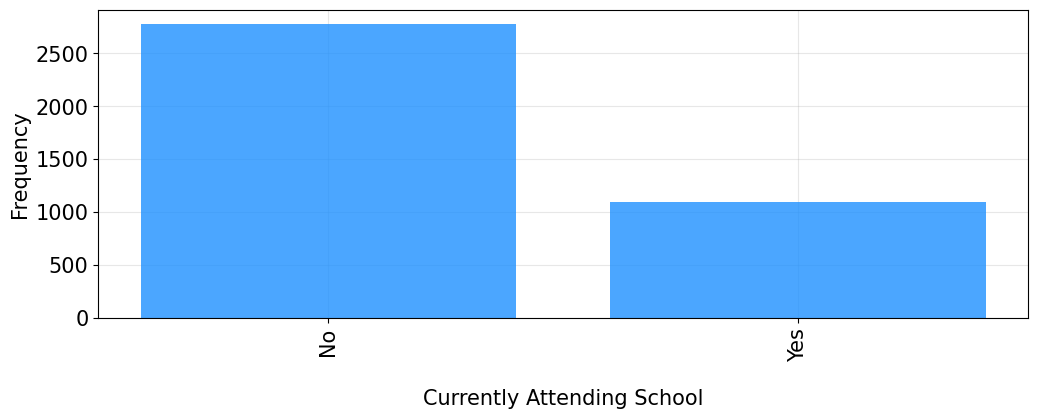

In [232]:
xticks_dict = {
    1: "Yes",
    2: "No"
}

plot_categorical_feature_frequency(df, "b07", xlabel="Currently Attending School", xticks_dict=xticks_dict)

### Occupation

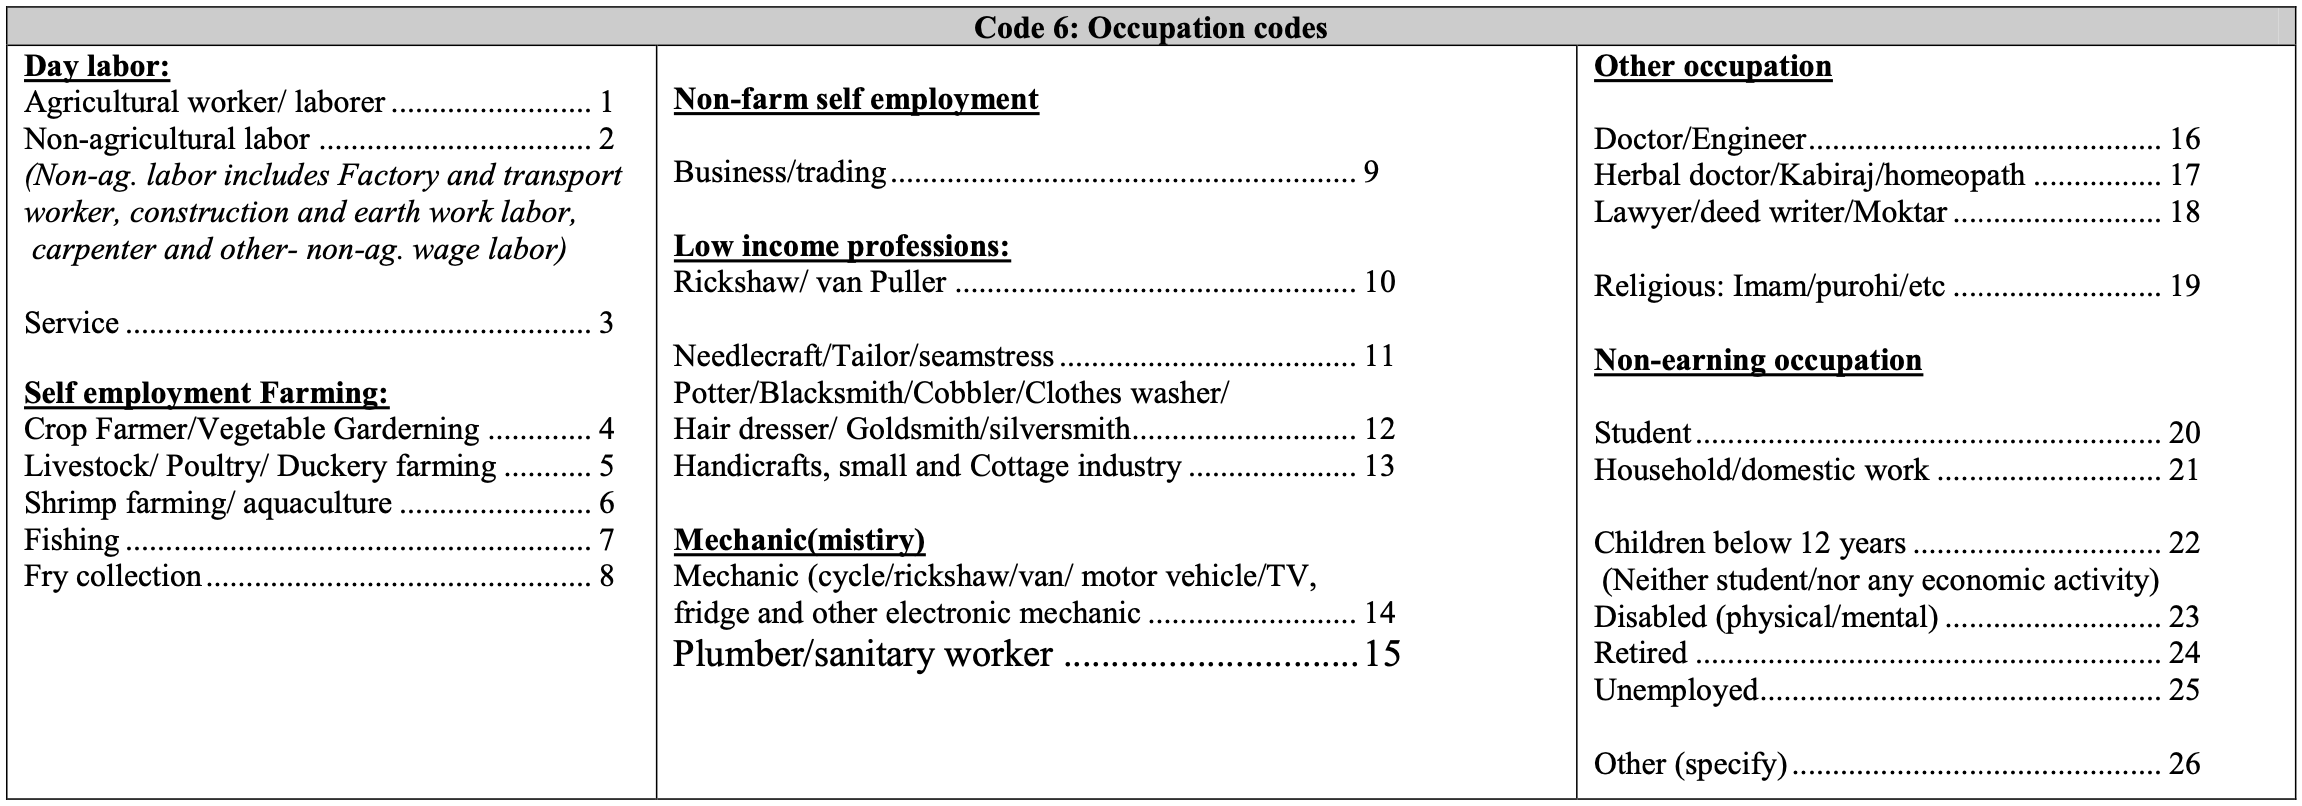

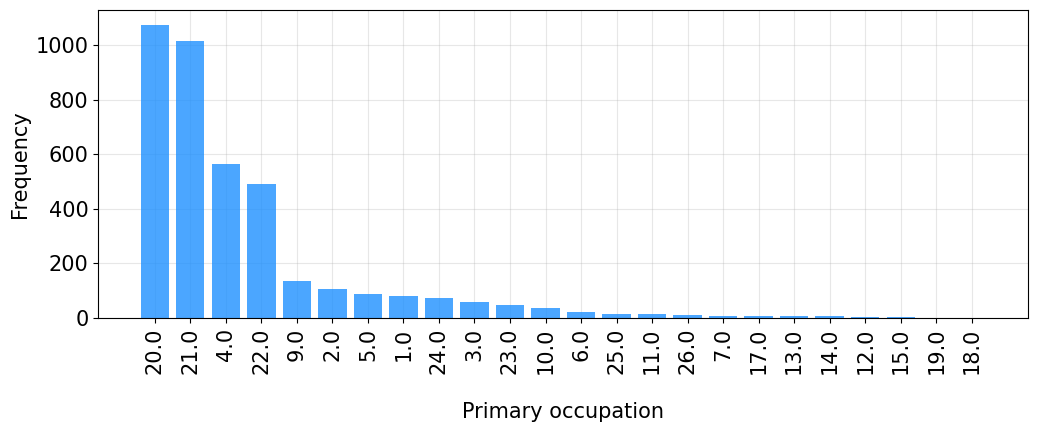

In [234]:
plot_categorical_feature_frequency(df, "b08_1", xlabel="Primary occupation")

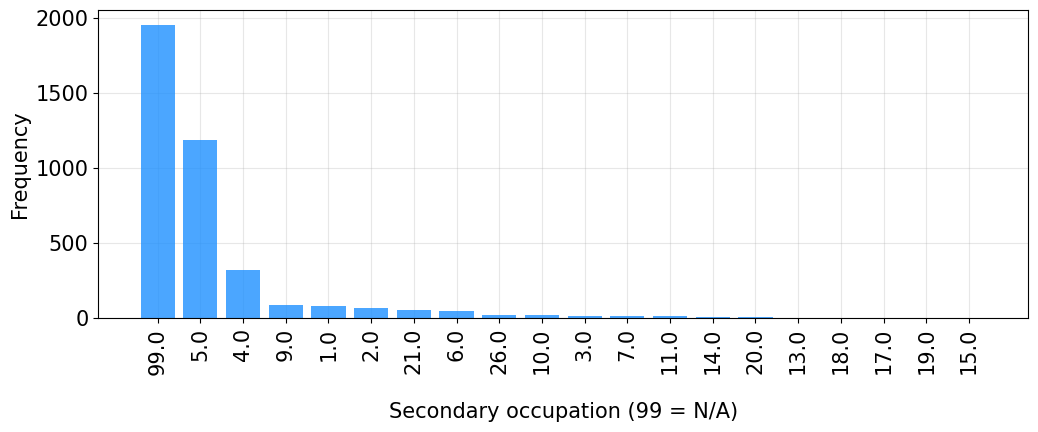

In [239]:
plot_categorical_feature_frequency(df, "b08_2", xlabel="Secondary occupation (99: N/A)")